# README MAKER

## Admin/Prep

In [1]:
# Chagne dir to match final README location
import os
if '.git' not in os.listdir():
    os.chdir("../")
os.getcwd()

'/Users/codingdojo/Documents/GitHub/_MY_PROJECTS/computer-vision-american-sign-language'

In [2]:
import os, json
from IPython.display import Markdown

config_file ="config/filepaths.json"
with open(config_file) as f:
    FPATHS = json.load(f)
FPATHS.keys()

dict_keys(['data', 'images', 'eda', 'modeling', 'readme'])

In [3]:
FPATHS['readme']

{'results_table_md': 'modeling/results_table.md',
 'Part01-intro_md': 'config/readme_part1_intro.md',
 'Part02-model': 'config/readme_part2_results.md',
 'Part03-explain': 'config/readme_part3_lime_explanations.md',
 'Part04-conclusion': 'config/readme_part4_conclusion.md'}

In [4]:
# Custom functions:
%load_ext autoreload
%autoreload 2
# sys.path.append(os.path.abspath("../../"))
import custom_functions as cf
# dir(cf)

### Prepare Results Table

In [5]:
logs_df = cf.logs.parse_log_file(FPATHS['modeling']['results_log'],clean_results=True, remove_fpaths=False)
logs_df.insert(0,'Rank',logs_df['Accuracy'].rank(ascending=False).astype(int))
logs_df = logs_df.set_index("Rank")
logs_df
logs_df



[i] Saved parsed logs to modeling/nn_training.csv


,Start Time,Name,Precision,Recall,F1-Score,Accuracy,Save Classification Report Fpath,Save History Fpath,Save Confusion Matrix Fpath,Fit Time,Model Save Fpath
Rank,,,,,,,,,,,
4,06/05/2024 16:35:35,towards-data-science-blog,0.488,0.444,0.433,0.452,modeling/models/towards-data-science-blog/clas...,modeling/models/towards-data-science-blog/hist...,modeling/models/towards-data-science-blog/conf...,0:01:14.607511,modeling/models/towards-data-science-blog
3,06/05/2024 16:36:57,cnn1-fixed-lr,0.499,0.471,0.456,0.482,modeling/models/cnn1-fixed-lr/classification_r...,modeling/models/cnn1-fixed-lr/history.png,modeling/models/cnn1-fixed-lr/confusion_matrix...,0:00:27.681576,modeling/models/cnn1-fixed-lr
5,06/05/2024 16:37:30,cnn1-scheduled-lr,0.002,0.038,0.003,0.039,modeling/models/cnn1-scheduled-lr/classificati...,modeling/models/cnn1-scheduled-lr/history.png,modeling/models/cnn1-scheduled-lr/confusion_ma...,0:00:19.401393,modeling/models/cnn1-scheduled-lr
2,06/05/2024 16:37:56,VGG16-01,0.654,0.612,0.599,0.614,modeling/models/VGG16-01/classification_report...,modeling/models/VGG16-01/history.png,modeling/models/VGG16-01/confusion_matrix.png,0:01:19.377717,modeling/models/VGG16-01
1,06/05/2024 16:39:27,EfficientNetB0-1,0.747,0.733,0.715,0.732,modeling/models/EfficientNetB0-1/classificatio...,modeling/models/EfficientNetB0-1/history.png,modeling/models/EfficientNetB0-1/confusion_mat...,0:01:24.104776,modeling/models/EfficientNetB0-1


In [6]:
best_model = logs_df.loc[1]
best_model

Start Time                                                        06/05/2024 16:39:27
Name                                                                 EfficientNetB0-1
Precision                                                                       0.747
Recall                                                                          0.733
F1-Score                                                                        0.715
Accuracy                                                                        0.732
Save Classification Report Fpath    modeling/models/EfficientNetB0-1/classificatio...
Save History Fpath                       modeling/models/EfficientNetB0-1/history.png
Save Confusion Matrix Fpath         modeling/models/EfficientNetB0-1/confusion_mat...
Fit Time                                                               0:01:24.104776
Model Save Fpath                                     modeling/models/EfficientNetB0-1
Name: 1, dtype: object

In [7]:
## PREPARE README TABLE
logs_df = cf.logs.parse_log_file(FPATHS['modeling']['results_log'])
# logs_df = parse_log_file(log_file,clean_results=True      )
readme_logs = logs_df.drop(columns=['Start Time'], errors='ignore')
readme_logs = readme_logs.sort_values('Accuracy', ascending=False)
readme_logs.insert(0,'Rank',readme_logs['Accuracy'].rank(ascending=False).astype(int))
# readme_logs = readme_logs.set_index(['Rank','Name'])
readme_logs


[i] Saved parsed logs to modeling/nn_training.csv


,Rank,Name,Precision,Recall,F1-Score,Accuracy,Fit Time,Model Save Fpath
4,1,EfficientNetB0-1,0.747,0.733,0.715,0.732,0:01:24.104776,modeling/models/EfficientNetB0-1
3,2,VGG16-01,0.654,0.612,0.599,0.614,0:01:19.377717,modeling/models/VGG16-01
1,3,cnn1-fixed-lr,0.499,0.471,0.456,0.482,0:00:27.681576,modeling/models/cnn1-fixed-lr
0,4,towards-data-science-blog,0.488,0.444,0.433,0.452,0:01:14.607511,modeling/models/towards-data-science-blog
2,5,cnn1-scheduled-lr,0.002,0.038,0.003,0.039,0:00:19.401393,modeling/models/cnn1-scheduled-lr


In [8]:
# # Save best model results as vars
# classification_logs_df.loc[1]

In [10]:
## save readme lgos
results_md_file = FPATHS['readme']['results_table_md']
readme_logs.to_markdown(results_md_file, index=False)

with open(results_md_file,'r') as f:
    display(Markdown(f.read()))

|   Rank | Name                      |   Precision |   Recall |   F1-Score |   Accuracy | Fit Time       | Model Save Fpath                          |
|-------:|:--------------------------|------------:|---------:|-----------:|-----------:|:---------------|:------------------------------------------|
|      1 | EfficientNetB0-1          |       0.747 |    0.733 |      0.715 |      0.732 | 0:01:24.104776 | modeling/models/EfficientNetB0-1          |
|      2 | VGG16-01                  |       0.654 |    0.612 |      0.599 |      0.614 | 0:01:19.377717 | modeling/models/VGG16-01                  |
|      3 | cnn1-fixed-lr             |       0.499 |    0.471 |      0.456 |      0.482 | 0:00:27.681576 | modeling/models/cnn1-fixed-lr             |
|      4 | towards-data-science-blog |       0.488 |    0.444 |      0.433 |      0.452 | 0:01:14.607511 | modeling/models/towards-data-science-blog |
|      5 | cnn1-scheduled-lr         |       0.002 |    0.038 |      0.003 |      0.039 | 0:00:19.401393 | modeling/models/cnn1-scheduled-lr         |

### Save Figures for f-strings

In [11]:
FPATHS['eda']

{'label-distrubtion-countplot_png': 'images/label-distribution-countplot.png',
 'test-labels-distrubtion_png': 'images/test-label-distribution-countplot.png',
 'example-images_png': 'images/ed_example_letters.png'}

In [12]:
# Save figure fpaths for f-strings
eda_class_balance = FPATHS['eda']['label-distrubtion-countplot_png']
eda_example_letters = FPATHS['eda']['example-images_png']
print(eda_example_letters, eda_class_balance)

images/ed_example_letters.png images/label-distribution-countplot.png


In [13]:
os.getcwd()

'/Users/codingdojo/Documents/GitHub/_MY_PROJECTS/computer-vision-american-sign-language'

In [14]:
os.path.exists(eda_class_balance),os.path.exists(eda_example_letters)

(True, True)

## README CONTENT

In [15]:
import datetime as dt
intro= f"""
# computer-vision-american-sign-language

-  Last Updated: {dt.date.today().strftime("%m/%d/%Y")}

<center><img src="images/American_Sign_Language_ASL.svg" width=500px>
<p>By Psiĥedelisto - Own work, Public Domain, <a href="https://commons.wikimedia.org/w/index.php?curid=53652991">"https://commons.wikimedia.org/w/index.php?curid=53652991</a><p>
</center>

## Description

This project aims to develop a computer vision system for American Sign Language (ASL) recognition. 


### Goals 
> - **The first/primary goal is to create a model that can classify images of letters from the ASL alphabet (26-class multi-classification)**
- Create a streamlit application that will accept an image and predict which letter it is.

> - **The second, above-and-beyond goal is to use video as the input and add object detection.**

### Features

- ASL letter and word translation
- User-friendly interface
- Support for multiple hand gestures

<center><img src="images/Sign_language_alphabet_(58).png" width=500px style="border:solid black 1px"> 

<p><a href="https://commons.wikimedia.org/wiki/File:Sign_language_alphabet_(58).png">Image Source</a> </p>
<p> Raziakhatun12, CC BY-SA 4.0 <https://creativecommons.org/licenses/by-sa/4.0>, via Wikimedia Commons</p>

</center>




## Data

### Source/Download
- Public Dataset from [Roboflow](https://public.roboflow.com/object-detection/american-sign-language-letters)


To download:
- Navigate to https://public.roboflow.com/object-detection/american-sign-language-letters
- Click `->` for Downloads.
- Select Format =  Multi-Label Classifiction
- Download zip to computer


### Data Details
- 26 letters of the alphabet
- J and Z are gesture-based letters and will likely be difficult to classify using static images.

- Number of Images: 1731
- Size: 416 x  416 
- Channels: 3

Example of Each letter:

<img src="{eda_example_letters}">


## EDA



### Class Balance




<img src="{eda_class_balance}">



### Methods


- Loading Images as a Tensorflow Dataset object.
    - Image size: 128 x 128
    - Batch size: 32   
    - No data augmentation due to nature of sign language.

- Constructing Convolutional Neural Networks in tensorflow.
- Applying transfer learning with pretrained models
- Explain image classifications using  Lime's ImageExplainer.


"""

# #### TO DO:

# - [x] Apply transfer learning
# - [x] Save best model for deployment
# = [ x Apply LimeExplainer with best model.
# - [ ] Tune the best architecture with keras tuner.
# - [ ] Create a streamlit application for live inference.

Markdown(intro)


# computer-vision-american-sign-language

-  Last Updated: 06/05/2024

<center><img src="images/American_Sign_Language_ASL.svg" width=500px>
<p>By Psiĥedelisto - Own work, Public Domain, <a href="https://commons.wikimedia.org/w/index.php?curid=53652991">"https://commons.wikimedia.org/w/index.php?curid=53652991</a><p>
</center>

## Description

This project aims to develop a computer vision system for American Sign Language (ASL) recognition. 


### Goals 
> - **The first/primary goal is to create a model that can classify images of letters from the ASL alphabet (26-class multi-classification)**
- Create a streamlit application that will accept an image and predict which letter it is.

> - **The second, above-and-beyond goal is to use video as the input and add object detection.**

### Features

- ASL letter and word translation
- User-friendly interface
- Support for multiple hand gestures

<center><img src="images/Sign_language_alphabet_(58).png" width=500px style="border:solid black 1px"> 

<p><a href="https://commons.wikimedia.org/wiki/File:Sign_language_alphabet_(58).png">Image Source</a> </p>
<p> Raziakhatun12, CC BY-SA 4.0 <https://creativecommons.org/licenses/by-sa/4.0>, via Wikimedia Commons</p>

</center>




## Data

### Source/Download
- Public Dataset from [Roboflow](https://public.roboflow.com/object-detection/american-sign-language-letters)


To download:
- Navigate to https://public.roboflow.com/object-detection/american-sign-language-letters
- Click `->` for Downloads.
- Select Format =  Multi-Label Classifiction
- Download zip to computer


### Data Details
- 26 letters of the alphabet
- J and Z are gesture-based letters and will likely be difficult to classify using static images.

- Number of Images: 1731
- Size: 416 x  416 
- Channels: 3

Example of Each letter:

<img src="images/ed_example_letters.png">


## EDA



### Class Balance




<img src="images/label-distribution-countplot.png">



### Methods


- Loading Images as a Tensorflow Dataset object.
    - Image size: 128 x 128
    - Batch size: 32   
    - No data augmentation due to nature of sign language.

- Constructing Convolutional Neural Networks in tensorflow.
- Applying transfer learning with pretrained models
- Explain image classifications using  Lime's ImageExplainer.




In [16]:
readme_part1_fpath = FPATHS['readme']['Part01-intro_md']#"config/readme_part1.md"

with open(readme_part1_fpath, 'w') as f:
    f.write(intro)

with open(readme_part1_fpath) as f:

    display(Markdown(f.read()))


# computer-vision-american-sign-language

-  Last Updated: 06/05/2024

<center><img src="images/American_Sign_Language_ASL.svg" width=500px>
<p>By Psiĥedelisto - Own work, Public Domain, <a href="https://commons.wikimedia.org/w/index.php?curid=53652991">"https://commons.wikimedia.org/w/index.php?curid=53652991</a><p>
</center>

## Description

This project aims to develop a computer vision system for American Sign Language (ASL) recognition. 


### Goals 
> - **The first/primary goal is to create a model that can classify images of letters from the ASL alphabet (26-class multi-classification)**
- Create a streamlit application that will accept an image and predict which letter it is.

> - **The second, above-and-beyond goal is to use video as the input and add object detection.**

### Features

- ASL letter and word translation
- User-friendly interface
- Support for multiple hand gestures

<center><img src="images/Sign_language_alphabet_(58).png" width=500px style="border:solid black 1px"> 

<p><a href="https://commons.wikimedia.org/wiki/File:Sign_language_alphabet_(58).png">Image Source</a> </p>
<p> Raziakhatun12, CC BY-SA 4.0 <https://creativecommons.org/licenses/by-sa/4.0>, via Wikimedia Commons</p>

</center>




## Data

### Source/Download
- Public Dataset from [Roboflow](https://public.roboflow.com/object-detection/american-sign-language-letters)


To download:
- Navigate to https://public.roboflow.com/object-detection/american-sign-language-letters
- Click `->` for Downloads.
- Select Format =  Multi-Label Classifiction
- Download zip to computer


### Data Details
- 26 letters of the alphabet
- J and Z are gesture-based letters and will likely be difficult to classify using static images.

- Number of Images: 1731
- Size: 416 x  416 
- Channels: 3

Example of Each letter:

<img src="images/ed_example_letters.png">


## EDA



### Class Balance




<img src="images/label-distribution-countplot.png">



### Methods


- Loading Images as a Tensorflow Dataset object.
    - Image size: 128 x 128
    - Batch size: 32   
    - No data augmentation due to nature of sign language.

- Constructing Convolutional Neural Networks in tensorflow.
- Applying transfer learning with pretrained models
- Explain image classifications using  Lime's ImageExplainer.




### Generate Resuls Programmatically from logs

In [17]:
# import pandas as pd
# # pd.read_table(results_table_md)
# readme_logs.set_index("Rank")

In [18]:
with open(results_md_file,'r') as f:
    results_table_md = f.read()

results_table_md

'|   Rank | Name                      |   Precision |   Recall |   F1-Score |   Accuracy | Fit Time       | Model Save Fpath                          |\n|-------:|:--------------------------|------------:|---------:|-----------:|-----------:|:---------------|:------------------------------------------|\n|      1 | EfficientNetB0-1          |       0.747 |    0.733 |      0.715 |      0.732 | 0:01:24.104776 | modeling/models/EfficientNetB0-1          |\n|      2 | VGG16-01                  |       0.654 |    0.612 |      0.599 |      0.614 | 0:01:19.377717 | modeling/models/VGG16-01                  |\n|      3 | cnn1-fixed-lr             |       0.499 |    0.471 |      0.456 |      0.482 | 0:00:27.681576 | modeling/models/cnn1-fixed-lr             |\n|      4 | towards-data-science-blog |       0.488 |    0.444 |      0.433 |      0.452 | 0:01:14.607511 | modeling/models/towards-data-science-blog |\n|      5 | cnn1-scheduled-lr         |       0.002 |    0.038 |      0.003 |      0.039

#### Saving Best Model

In [19]:
logs_df = cf.logs.parse_log_file(FPATHS['modeling']['results_log'],clean_results=True, remove_fpaths=False)
logs_df.insert(0,'Rank',logs_df['Accuracy'].rank(ascending=False).astype(int))
logs_df = logs_df.set_index("Rank")
logs_df
logs_df



[i] Saved parsed logs to modeling/nn_training.csv


,Start Time,Name,Precision,Recall,F1-Score,Accuracy,Save Classification Report Fpath,Save History Fpath,Save Confusion Matrix Fpath,Fit Time,Model Save Fpath
Rank,,,,,,,,,,,
4,06/05/2024 16:35:35,towards-data-science-blog,0.488,0.444,0.433,0.452,modeling/models/towards-data-science-blog/clas...,modeling/models/towards-data-science-blog/hist...,modeling/models/towards-data-science-blog/conf...,0:01:14.607511,modeling/models/towards-data-science-blog
3,06/05/2024 16:36:57,cnn1-fixed-lr,0.499,0.471,0.456,0.482,modeling/models/cnn1-fixed-lr/classification_r...,modeling/models/cnn1-fixed-lr/history.png,modeling/models/cnn1-fixed-lr/confusion_matrix...,0:00:27.681576,modeling/models/cnn1-fixed-lr
5,06/05/2024 16:37:30,cnn1-scheduled-lr,0.002,0.038,0.003,0.039,modeling/models/cnn1-scheduled-lr/classificati...,modeling/models/cnn1-scheduled-lr/history.png,modeling/models/cnn1-scheduled-lr/confusion_ma...,0:00:19.401393,modeling/models/cnn1-scheduled-lr
2,06/05/2024 16:37:56,VGG16-01,0.654,0.612,0.599,0.614,modeling/models/VGG16-01/classification_report...,modeling/models/VGG16-01/history.png,modeling/models/VGG16-01/confusion_matrix.png,0:01:19.377717,modeling/models/VGG16-01
1,06/05/2024 16:39:27,EfficientNetB0-1,0.747,0.733,0.715,0.732,modeling/models/EfficientNetB0-1/classificatio...,modeling/models/EfficientNetB0-1/history.png,modeling/models/EfficientNetB0-1/confusion_mat...,0:01:24.104776,modeling/models/EfficientNetB0-1


In [20]:
best_model = logs_df.loc[1]
best_model

Start Time                                                        06/05/2024 16:39:27
Name                                                                 EfficientNetB0-1
Precision                                                                       0.747
Recall                                                                          0.733
F1-Score                                                                        0.715
Accuracy                                                                        0.732
Save Classification Report Fpath    modeling/models/EfficientNetB0-1/classificatio...
Save History Fpath                       modeling/models/EfficientNetB0-1/history.png
Save Confusion Matrix Fpath         modeling/models/EfficientNetB0-1/confusion_mat...
Fit Time                                                               0:01:24.104776
Model Save Fpath                                     modeling/models/EfficientNetB0-1
Name: 1, dtype: object

In [21]:
# os.getcwd()

In [22]:
# os.path.exists('modeling/models/towards-data-science_lr-schedule/classification_report.txt')

Metal device set to: Apple M1 Pro


dict_keys(['classification_report', 'history_fig', 'confusion_matrix_fig', 'model'])

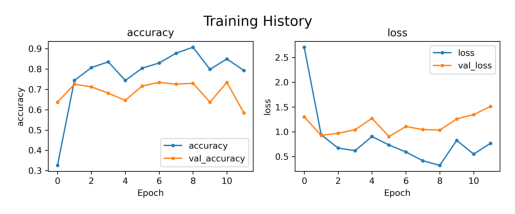

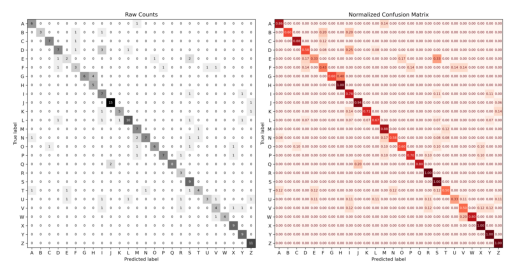

In [24]:
results = cf.logs.load_model_results(best_model['Model Save Fpath'])#best_model["Name"], model_directory = FPATHS['modeling']['model_dir'],load_model=False)
results.keys()

In [25]:
best_model['Model Save Fpath']

'modeling/models/EfficientNetB0-1'

In [24]:
# results = cf.logs.load_model_results()

In [26]:
best_model_name = best_model['Name']
best_model_history_fpath= best_model['Save History Fpath']
best_model_classification_report_fpath =best_model['Save Classification Report Fpath']
with open(best_model_classification_report_fpath) as f:
    
    best_model_classification_report = f.read()
    
best_model_confusion_matrix_fpath =  best_model["Save Confusion Matrix Fpath"]
best_model_confusion_matrix_fpath

'modeling/models/EfficientNetB0-1/confusion_matrix.png'

In [27]:
os.path.exists(best_model_confusion_matrix_fpath)

True

In [28]:
best_model_history_fpath

'modeling/models/EfficientNetB0-1/history.png'

<img src='modeling/models/cnn1-fixed-lr/history.png'>

In [30]:
## OLD/CURRENT REULTS

results= f"""
## Results

Each of the final models included in the analysis are listed in the table below. 

{results_table_md}

### Best Model

- {best_model_name}


#### Test Results


<img src="{best_model_history_fpath}">

```
{best_model_classification_report}
```


<img src="{best_model_confusion_matrix_fpath}">

"""
Markdown(results)
# <img src="images/best_model_results_bar.png">
readme_part2_fpath = FPATHS['readme']['Part02-model'] #$'config/readme_part2_results.md'
with open(readme_part2_fpath,'w') as f:
    f.write(results)

with open(readme_part2_fpath,'r') as f:
    display(Markdown(f.read()))


## Results

Each of the final models included in the analysis are listed in the table below. 

|   Rank | Name                      |   Precision |   Recall |   F1-Score |   Accuracy | Fit Time       | Model Save Fpath                          |
|-------:|:--------------------------|------------:|---------:|-----------:|-----------:|:---------------|:------------------------------------------|
|      1 | EfficientNetB0-1          |       0.747 |    0.733 |      0.715 |      0.732 | 0:01:24.104776 | modeling/models/EfficientNetB0-1          |
|      2 | VGG16-01                  |       0.654 |    0.612 |      0.599 |      0.614 | 0:01:19.377717 | modeling/models/VGG16-01                  |
|      3 | cnn1-fixed-lr             |       0.499 |    0.471 |      0.456 |      0.482 | 0:00:27.681576 | modeling/models/cnn1-fixed-lr             |
|      4 | towards-data-science-blog |       0.488 |    0.444 |      0.433 |      0.452 | 0:01:14.607511 | modeling/models/towards-data-science-blog |
|      5 | cnn1-scheduled-lr         |       0.002 |    0.038 |      0.003 |      0.039 | 0:00:19.401393 | modeling/models/cnn1-scheduled-lr         |

### Best Model

- EfficientNetB0-1


#### Test Results


<img src="modeling/models/EfficientNetB0-1/history.png">

```
--------------------------------------------------------------------------------
 Classification Metrics: Test Data 
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           A       0.75      0.86      0.80         7
           B       1.00      0.60      0.75         5
           C       0.88      0.88      0.88         8
           D       0.70      0.58      0.64        12
           E       0.50      0.33      0.40         6
           F       0.50      0.43      0.46         7
           G       1.00      0.60      0.75        10
           H       0.56      1.00      0.71         5
           I       0.47      0.78      0.58         9
           J       0.88      0.94      0.91        16
           K       0.83      0.71      0.77         7
           L       0.83      0.67      0.74        15
           M       0.58      0.88      0.70         8
           N       0.88      0.58      0.70        12
           O       0.86      0.60      0.71        10
           P       0.88      0.70      0.78        10
           Q       1.00      0.80      0.89        10
           R       0.50      1.00      0.67         3
           S       0.56      1.00      0.72         9
           T       0.67      0.50      0.57         8
           U       0.75      0.33      0.46         9
           V       0.57      0.50      0.53         8
           W       1.00      0.80      0.89         5
           X       0.75      1.00      0.86         9
           Y       0.75      1.00      0.86         9
           Z       0.79      1.00      0.88        11

    accuracy                           0.73       228
   macro avg       0.75      0.73      0.72       228
weighted avg       0.77      0.73      0.73       228

--------------------------------------------------------------------------------
```


<img src="modeling/models/EfficientNetB0-1/confusion_matrix.png">



### Lime Explanations

In [42]:

readme_lime_explanations_fpath = FPATHS['readme']['Part03-explain']


with open(readme_lime_explanations_fpath) as f:
    display(Markdown(f.read()))


### Explaining Model Predictions with LIME

- To better understand how the model was correctly or incorrectly classifying an image, we leveraged LIME's Image Explainer.
- LIME's image explainer creates its own model to explain a model's prediction for a single image at a time. By inspecting the images the model is having difficulty with, we can get insights into how to change our modeling process/architecture.

#### LIME Explanation for Correctly Classified Image

<img src="images/lime-explain-correct.png">

Here we can see that the model was able to identify the letter O using the palm and thumb. The model used the crevice betwen the pinky and ring finges to differeniate between O and F.

The letters O and F in ASL are indeed similar, as both involve the fingers forming a loop. However, they have distinct differences that can be critical for accurate classification.


- Key Similarities:
    - Both letters involve forming a loop with the fingers.
    - Both have a circular shape as part of the sign.
- Key Differences:
    - In the letter O, all fingers and the thumb touch to form the circle, while in the letter F, only the thumb and index finger touch.
    - The remaining fingers in the letter F are extended, whereas in the letter O, they are curved and relaxed.
#### LIME Explanation for an Incorrectly Classified Image (Image Quality)

<img src="images/lime-explain-incorrect-bad-img.png">


Here we can see that the model was able was confused by the image itself.
It seems to have mistaken the wood flooring for human fingers, thus preventing it from identifying the letter correctly.
Images like this should either be removed from the dataset or, ideally, augmented with an appropriate amount of data augmentaion.
If this task was converted to include object recognition, the model may have been able to classify it correctly.

This also underscores the need for quality, high-resolution training data for the best results.

#### LIME Explanation for Incorrect 
Here we can see a D that was mistaken for an I. This is an understandable mistake, as the two letters have strong similarities.

<img src="images/image-explain-incorrect.png"> 

- Key Similarities:
    - Single Extended Finger: Both D and I involve extending a single finger straight up. In D, it’s the index finger, while in I, it’s the pinky finger. This similarity can easily confuse a computer vision model, especially if the finger is not clearly visible due to angle or occlusion.
    - Curled Fingers: The rest of the fingers are curled or touching the thumb in both signs, forming a rounded shape that can look quite similar from certain angles.
     - Hand Orientation: Both letters are presented with the palm facing outward or slightly to the side, making it harder for the model to rely on palm orientation as a distinguishing feature.
- Key Differences:
     - Finger Extended: The primary difference lies in which finger is extended. The index finger for D and the pinky finger for I. The model needs to be trained to focus on which specific finger is extended.
    - Hand Shape: For D, the remaining fingers form a rounded base with the thumb, while for I, the remaining fingers form a fist. This difference in hand shape can be subtle and requires high-resolution images and careful feature extraction to capture effectively.
    - Thumb Position: In D, the thumb is actively touching the curved fingers, forming a distinct circle, while in I, the thumb is less prominent and rests over the curled fingers.

### LIME Explanations - Implications for Modeling

To increase the ease of training of a model to better distinguish between similar letters, we should consider the following:

- Use High-Resolution images to capture the fine details of finger positioning.
    - This could be as simple as increasing the height and width of the input images, or may involve acquiring higher quality training data.
- Apply Data Augmentation techniques to ensure the model sees these letters from various angles and under different lighting conditions.
    - Due to the nature of the ASL alphabet and the expected orientation of the hand, data augmentation should be applied much more carefully than with other tasks where orientation is more variable.
- Feature Extraction: Focus on extracting features related to the number of extended fingers and the specific shape and orientation of the thumb.
    - Investigate the feature maps extracted from each convolution layer to better optimize feature extraction.
    
- More robust training using more examples of letters that are very similar.


### Part 4 /Conclusion

In [39]:
conclusion ="""### To Dos:
- [x] Apply transfer learning
- [x] Apply LimeExplainer with best model. 
- [ ] Continue tuning the best architecture with the Keras tuner.
- [ ] Assess inclusion of data augmentation on model performance.
- [ ] Save the best model for deployment using model quantization.

- [ ] Deploy a streamlit application for live inference from uploaded images. 


### Future Work

There are many more iterations to test for this task:
- [ ] Does image augmentation help the models? If so, what augmentations can be applied safely for this task?
- [ ] Does adding additional hidden layers on top of EfficientNet improve performance?
- [ ] Do other available transfer learning models outperform efficient net?
- [ ] Does allowing the transfer learning models to train the convolutional base improve performance?


> **The next level of complexity would be to add object detection for hands, followed by sign classification.** The ultimate goal would be to use video input for ASL alphabet letter detection and classification.

## Summary

This project demonstrates proof-of-concept work classifying ASL alphabetical characters. Working with a 26-label classification model is tricky, but pales in comparison to what would be required to interpert whole ASL words.


"""

In [40]:
readme_part4_fpath =  FPATHS['readme']['Part04-conclusion'] #'config/readme_part3_results.md'
with open(readme_part4_fpath,'w') as f:
    f.write(conclusion)

with open(readme_part4_fpath,'r') as f:
    display(Markdown(f.read()))

### To Dos:
- [x] Apply transfer learning
- [x] Apply LimeExplainer with best model. 
- [ ] Continue tuning the best architecture with the Keras tuner.
- [ ] Assess inclusion of data augmentation on model performance.
- [ ] Save the best model for deployment using model quantization.

- [ ] Deploy a streamlit application for live inference from uploaded images. 


### Future Work

There are many more iterations to test for this task:
- [ ] Does image augmentation help the models? If so, what augmentations can be applied safely for this task?
- [ ] Does adding additional hidden layers on top of EfficientNet improve performance?
- [ ] Do other available transfer learning models outperform efficient net?
- [ ] Does allowing the transfer learning models to train the convolutional base improve performance?


> **The next level of complexity would be to add object detection for hands, followed by sign classification.** The ultimate goal would be to use video input for ASL alphabet letter detection and classification.

## Summary

This project demonstrates proof-of-concept work classifying ASL alphabetical characters. Working with a 26-label classification model is tricky, but pales in comparison to what would be required to interpert whole ASL words.




# Combine Into Final README

In [43]:
files_to_merge=  [readme_part1_fpath, readme_part2_fpath,readme_lime_explanations_fpath, readme_part4_fpath]
readme_text = ""
for file in files_to_merge:
    with open(file) as f:
        text = f.read()
        readme_text+="\n"+text
display(Markdown(readme_text))



# computer-vision-american-sign-language

-  Last Updated: 06/05/2024

<center><img src="images/American_Sign_Language_ASL.svg" width=500px>
<p>By Psiĥedelisto - Own work, Public Domain, <a href="https://commons.wikimedia.org/w/index.php?curid=53652991">"https://commons.wikimedia.org/w/index.php?curid=53652991</a><p>
</center>

## Description

This project aims to develop a computer vision system for American Sign Language (ASL) recognition. 


### Goals 
> - **The first/primary goal is to create a model that can classify images of letters from the ASL alphabet (26-class multi-classification)**
- Create a streamlit application that will accept an image and predict which letter it is.

> - **The second, above-and-beyond goal is to use video as the input and add object detection.**

### Features

- ASL letter and word translation
- User-friendly interface
- Support for multiple hand gestures

<center><img src="images/Sign_language_alphabet_(58).png" width=500px style="border:solid black 1px"> 

<p><a href="https://commons.wikimedia.org/wiki/File:Sign_language_alphabet_(58).png">Image Source</a> </p>
<p> Raziakhatun12, CC BY-SA 4.0 <https://creativecommons.org/licenses/by-sa/4.0>, via Wikimedia Commons</p>

</center>




## Data

### Source/Download
- Public Dataset from [Roboflow](https://public.roboflow.com/object-detection/american-sign-language-letters)


To download:
- Navigate to https://public.roboflow.com/object-detection/american-sign-language-letters
- Click `->` for Downloads.
- Select Format =  Multi-Label Classifiction
- Download zip to computer


### Data Details
- 26 letters of the alphabet
- J and Z are gesture-based letters and will likely be difficult to classify using static images.

- Number of Images: 1731
- Size: 416 x  416 
- Channels: 3

Example of Each letter:

<img src="images/ed_example_letters.png">


## EDA



### Class Balance




<img src="images/label-distribution-countplot.png">



### Methods


- Loading Images as a Tensorflow Dataset object.
    - Image size: 128 x 128
    - Batch size: 32   
    - No data augmentation due to nature of sign language.

- Constructing Convolutional Neural Networks in tensorflow.
- Applying transfer learning with pretrained models
- Explain image classifications using  Lime's ImageExplainer.




## Results

Each of the final models included in the analysis are listed in the table below. 

|   Rank | Name                      |   Precision |   Recall |   F1-Score |   Accuracy | Fit Time       | Model Save Fpath                          |
|-------:|:--------------------------|------------:|---------:|-----------:|-----------:|:---------------|:------------------------------------------|
|      1 | EfficientNetB0-1          |       0.747 |    0.733 |      0.715 |      0.732 | 0:01:24.104776 | modeling/models/EfficientNetB0-1          |
|      2 | VGG16-01                  |       0.654 |    0.612 |      0.599 |      0.614 | 0:01:19.377717 | modeling/models/VGG16-01                  |
|      3 | cnn1-fixed-lr             |       0.499 |    0.471 |      0.456 |      0.482 | 0:00:27.681576 | modeling/models/cnn1-fixed-lr             |
|      4 | towards-data-science-blog |       0.488 |    0.444 |      0.433 |      0.452 | 0:01:14.607511 | modeling/models/towards-data-science-blog |
|      5 | cnn1-scheduled-lr         |       0.002 |    0.038 |      0.003 |      0.039 | 0:00:19.401393 | modeling/models/cnn1-scheduled-lr         |

### Best Model

- EfficientNetB0-1


#### Test Results


<img src="modeling/models/EfficientNetB0-1/history.png">

```
--------------------------------------------------------------------------------
 Classification Metrics: Test Data 
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           A       0.75      0.86      0.80         7
           B       1.00      0.60      0.75         5
           C       0.88      0.88      0.88         8
           D       0.70      0.58      0.64        12
           E       0.50      0.33      0.40         6
           F       0.50      0.43      0.46         7
           G       1.00      0.60      0.75        10
           H       0.56      1.00      0.71         5
           I       0.47      0.78      0.58         9
           J       0.88      0.94      0.91        16
           K       0.83      0.71      0.77         7
           L       0.83      0.67      0.74        15
           M       0.58      0.88      0.70         8
           N       0.88      0.58      0.70        12
           O       0.86      0.60      0.71        10
           P       0.88      0.70      0.78        10
           Q       1.00      0.80      0.89        10
           R       0.50      1.00      0.67         3
           S       0.56      1.00      0.72         9
           T       0.67      0.50      0.57         8
           U       0.75      0.33      0.46         9
           V       0.57      0.50      0.53         8
           W       1.00      0.80      0.89         5
           X       0.75      1.00      0.86         9
           Y       0.75      1.00      0.86         9
           Z       0.79      1.00      0.88        11

    accuracy                           0.73       228
   macro avg       0.75      0.73      0.72       228
weighted avg       0.77      0.73      0.73       228

--------------------------------------------------------------------------------
```


<img src="modeling/models/EfficientNetB0-1/confusion_matrix.png">


### Explaining Model Predictions with LIME

- To better understand how the model was correctly or incorrectly classifying an image, we leveraged LIME's Image Explainer.
- LIME's image explainer creates its own model to explain a model's prediction for a single image at a time. By inspecting the images the model is having difficulty with, we can get insights into how to change our modeling process/architecture.

#### LIME Explanation for Correctly Classified Image

<img src="images/lime-explain-correct.png">

Here we can see that the model was able to identify the letter O using the palm and thumb. The model used the crevice betwen the pinky and ring finges to differeniate between O and F.

The letters O and F in ASL are indeed similar, as both involve the fingers forming a loop. However, they have distinct differences that can be critical for accurate classification.


- Key Similarities:
    - Both letters involve forming a loop with the fingers.
    - Both have a circular shape as part of the sign.
- Key Differences:
    - In the letter O, all fingers and the thumb touch to form the circle, while in the letter F, only the thumb and index finger touch.
    - The remaining fingers in the letter F are extended, whereas in the letter O, they are curved and relaxed.
#### LIME Explanation for an Incorrectly Classified Image (Image Quality)

<img src="images/lime-explain-incorrect-bad-img.png">


Here we can see that the model was able was confused by the image itself.
It seems to have mistaken the wood flooring for human fingers, thus preventing it from identifying the letter correctly.
Images like this should either be removed from the dataset or, ideally, augmented with an appropriate amount of data augmentaion.
If this task was converted to include object recognition, the model may have been able to classify it correctly.

This also underscores the need for quality, high-resolution training data for the best results.

#### LIME Explanation for Incorrect 
Here we can see a D that was mistaken for an I. This is an understandable mistake, as the two letters have strong similarities.

<img src="images/image-explain-incorrect.png"> 

- Key Similarities:
    - Single Extended Finger: Both D and I involve extending a single finger straight up. In D, it’s the index finger, while in I, it’s the pinky finger. This similarity can easily confuse a computer vision model, especially if the finger is not clearly visible due to angle or occlusion.
    - Curled Fingers: The rest of the fingers are curled or touching the thumb in both signs, forming a rounded shape that can look quite similar from certain angles.
     - Hand Orientation: Both letters are presented with the palm facing outward or slightly to the side, making it harder for the model to rely on palm orientation as a distinguishing feature.
- Key Differences:
     - Finger Extended: The primary difference lies in which finger is extended. The index finger for D and the pinky finger for I. The model needs to be trained to focus on which specific finger is extended.
    - Hand Shape: For D, the remaining fingers form a rounded base with the thumb, while for I, the remaining fingers form a fist. This difference in hand shape can be subtle and requires high-resolution images and careful feature extraction to capture effectively.
    - Thumb Position: In D, the thumb is actively touching the curved fingers, forming a distinct circle, while in I, the thumb is less prominent and rests over the curled fingers.

### LIME Explanations - Implications for Modeling

To increase the ease of training of a model to better distinguish between similar letters, we should consider the following:

- Use High-Resolution images to capture the fine details of finger positioning.
    - This could be as simple as increasing the height and width of the input images, or may involve acquiring higher quality training data.
- Apply Data Augmentation techniques to ensure the model sees these letters from various angles and under different lighting conditions.
    - Due to the nature of the ASL alphabet and the expected orientation of the hand, data augmentation should be applied much more carefully than with other tasks where orientation is more variable.
- Feature Extraction: Focus on extracting features related to the number of extended fingers and the specific shape and orientation of the thumb.
    - Investigate the feature maps extracted from each convolution layer to better optimize feature extraction.
    
- More robust training using more examples of letters that are very similar.

### To Dos:
- [x] Apply transfer learning
- [x] Apply LimeExplainer with best model. 
- [ ] Continue tuning the best architecture with the Keras tuner.
- [ ] Assess inclusion of data augmentation on model performance.
- [ ] Save the best model for deployment using model quantization.

- [ ] Deploy a streamlit application for live inference from uploaded images. 


### Future Work

There are many more iterations to test for this task:
- [ ] Does image augmentation help the models? If so, what augmentations can be applied safely for this task?
- [ ] Does adding additional hidden layers on top of EfficientNet improve performance?
- [ ] Do other available transfer learning models outperform efficient net?
- [ ] Does allowing the transfer learning models to train the convolutional base improve performance?


> **The next level of complexity would be to add object detection for hands, followed by sign classification.** The ultimate goal would be to use video input for ASL alphabet letter detection and classification.

## Summary

This project demonstrates proof-of-concept work classifying ASL alphabetical characters. Working with a 26-label classification model is tricky, but pales in comparison to what would be required to interpert whole ASL words.




In [44]:
if '.git' in os.listdir():
    print("Saving README")
    with open("README.md",'w') as f:
        f.write(readme_text)
else:
    raise Exception(".git not found")

Saving README
